# Career Foundry Exercise 4.9 - Visualizations for 4.10 Presentation
#### Gabriel Pollicar, December 13 , 2023

### _________________________________________________________________

## Contents List:

### - Importing Libraries and Datasets

### - Key Questions for Marketing Strategies
#### 1. Busiest Days of the Week and Hours of the Day
#### 2. Times of Day with Highest Revenue
#### 3. Price Range Groupings
#### 4. Most Popular Products
#### 5. Ordering Habits based on Customer Loyalty
#### 6. Ordering Habits based on Customer Region
#### 7. Ordering Habits based on Customer Profiles

### - Exporting Datasets

### _________________________________________________________________


## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## Importing Datasets

In [2]:
# Importing the final Active Customers Dataset from Part I
# This dataset holds all initial columns remaining from the dataset at the end of Part I, 
path3 = r'C:\Users\polli\Career Foundry Python'
ords_prods_cust = pd.read_pickle(os.path.join(path3, 'Exercise 4.10','02 Data', 'Active Customers Dataset.pkl'))

In [3]:
# Importing the final Active Customers Dataset from Part II
## This dataset holds all columns with flags of customer profiles generated in Part II
# I used two datasets to import all columns without exceeding memory usage
path3 = r'C:\Users\polli\Career Foundry Python'
ords_prods_cust2 = pd.read_pickle(os.path.join(path3, 'Exercise 4.10','02 Data', 'Profiled Customers Dataset.pkl'))

In [4]:
ords_prods_cust2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   product_name          object 
 1   prices                float64
 2   orders_day_of_week    int64  
 3   order_time(hour)      int64  
 4   loyalty_flag          object 
 5   Average_Spent         float64
 6   Spending_Flag         object 
 7   order_frequency_flag  object 
 8   Region                object 
 9   Profile               object 
 10  Income_Group          object 
 11  dependants_group      object 
 12  WorkWeek              object 
 13  department            object 
 14  ordertime             object 
dtypes: float64(2), int64(2), object(11)
memory usage: 3.5+ GB


## Creating Subsets

In [55]:
# This code creates a smaller subset of the data called small_ords_prods_cust
# df_2 holds 30% of data randomly chosen across entire dataset
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7
small = ords_prods_cust[~dev]
small_ords_prods_cust = small

In [56]:
small_ords_prods_cust.head(1)

,product_id,product_name,department_id,prices,orders_day_of_week,order_time(hour),loyalty_flag,Average_Spent,Spending_Flag,order_frequency_flag,State,Age,n_dependants,fam_status,income,Region,Profile
0,1,Chocolate Sandwich Cookies,19,6,6,11,Regular customer,7,Low_spender,Frequent customer,Minnesota,81,1,married,49620,Midwest,Old and Married


In [8]:
# This code creates a smaller subset of the data called df_2
# df_2 holds 30% of data randomly chosen across entire dataset
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust2)) <= 0.7
small2 = ords_prods_cust2[~dev]
small_ords_prods_cust2 = small2

In [9]:
small_ords_prods_cust2.head(1)

,product_name,prices,orders_day_of_week,order_time(hour),loyalty_flag,Average_Spent,Spending_Flag,order_frequency_flag,Region,Profile,Income_Group,dependants_group,WorkWeek,department,ordertime
0,Chocolate Sandwich Cookies,5.8,6,11,Regular customer,6.935811,Low_spender,Frequent customer,Midwest,Old and Married,Low Income,Has dependants,Weekend,snacks,Morning


# - Key Questions for Marketing Strategies

## 1. Busiest Days of the Week and Hours of the Day

C:\Users\polli\AppData\Local\Temp\ipykernel_40556\2474249951.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  Ordersby_Weekday_line.set_xticklabels( (' ','Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' ') )


[Text(-1.0, 0, ' '),
 Text(0.0, 0, 'Saturday'),
 Text(1.0, 0, 'Sunday'),
 Text(2.0, 0, 'Monday'),
 Text(3.0, 0, 'Tuesday'),
 Text(4.0, 0, 'Wednesday'),
 Text(5.0, 0, 'Thursday'),
 Text(6.0, 0, 'Friday'),
 Text(7.0, 0, ' ')]

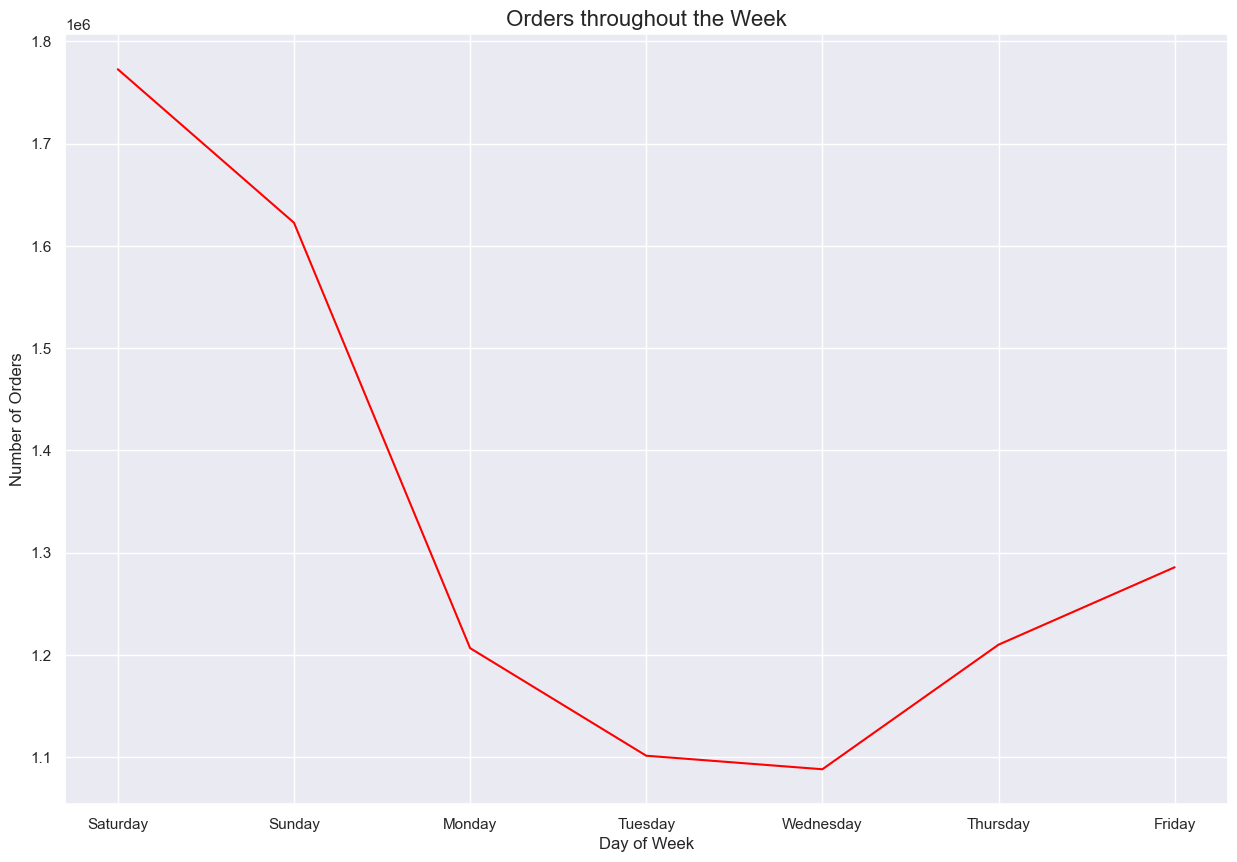

In [82]:
# This code creates a line graph counting the number of orders made throughout the day, 
# This chart is showing only a small subset of data 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'

data2 = small_ords_prods_cust['orders_day_of_week'].value_counts().rename_axis('unique_values').reset_index(name='counts')
Ordersby_Weekday_line = sns.lineplot(x='unique_values', y = 'counts', data=data2, color = 'red', zorder = 3)

plt.xlabel("Day of Week", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders', fontdict={'fontsize' : 12})
plt.title('Orders throughout the Week', fontdict={'fontsize' : 16})
plt.grid(zorder=0)
sns.set(rc={'figure.figsize':(15,10)})
Ordersby_Weekday_line.set_xticklabels( (' ','Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' ') )

#### Observation:
It seems that the Saturday is the day of the week with the highest amount of orders. This decreases throughout the week, with the lowest amount of orders on Wednesday. The amount of orders increases from there to Friday. 

In [30]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Weekday_line.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Orders by the Day Line Chart.png'))

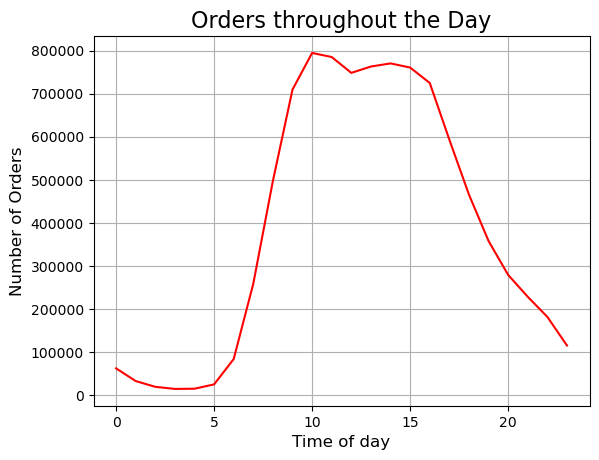

In [10]:
# This code creates a line graph counting the number of orders made throughout the day, 
# This chart is showing only a small subset of data 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'

data2 = small_ords_prods_cust['order_time(hour)'].value_counts().rename_axis('unique_values').reset_index(name='counts')
Ordersby_Time_bar = sns.lineplot(x='unique_values', y = 'counts', data=data2, color = 'red', zorder = 3)

plt.xlabel("Time of day", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders', fontdict={'fontsize' : 12})
plt.title('Orders throughout the Day', fontdict={'fontsize' : 16})
plt.grid(zorder=0)

#### Observation:
It seems that the 10am is the highest peak of orders according to the subset. The amount of orders for each hour remain high until 3pm where most orders drop off. The lowest amount of orders is in the early morning around 4am which would be expected. 

In [ ]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Time_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Orders by the Hour Bar Chart.png'))

## 2. Times of Day with Highest Revenue

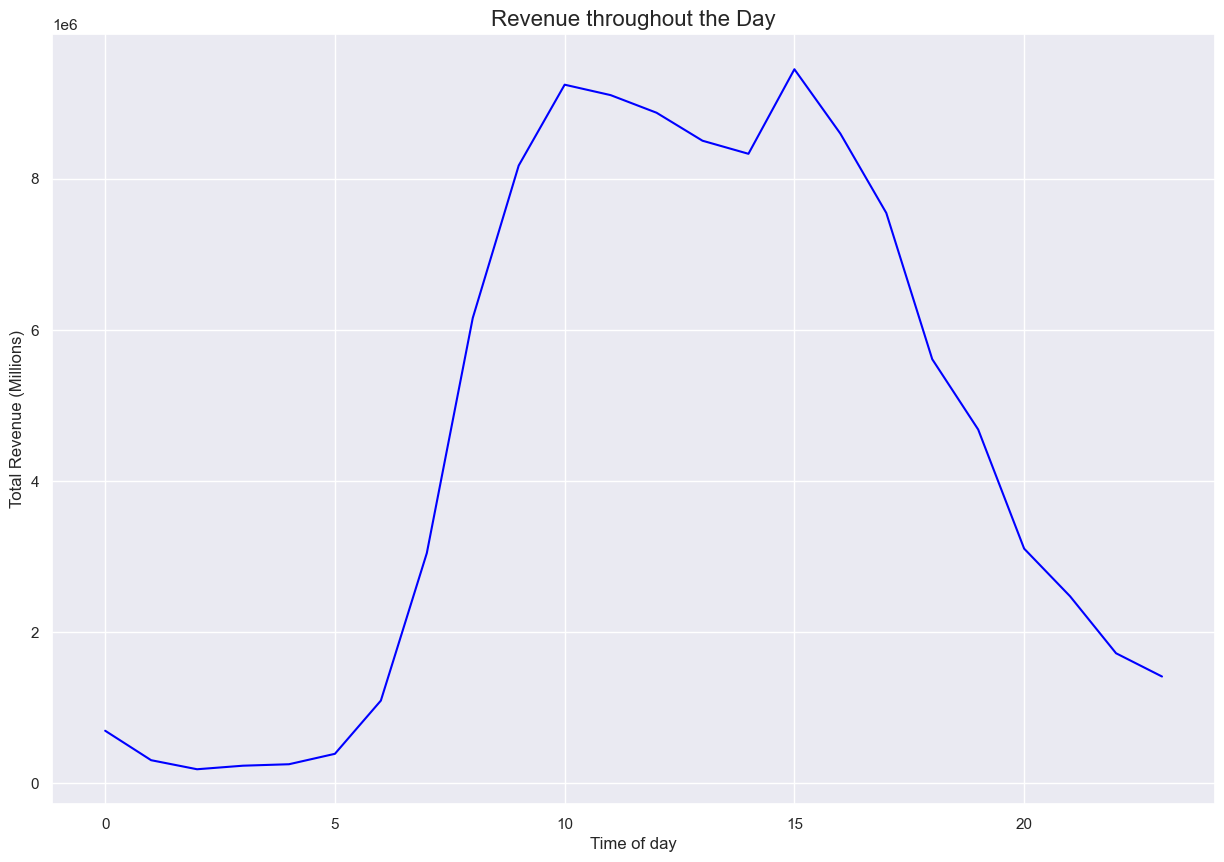

In [37]:
# This code creates a line graph counting the amount of revenue made throughout the day, 
# This chart is showing only a small subset of data 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'
TimeRevenue_CT = small_ords_prods_cust.groupby('order_time(hour)', as_index=False)['prices'].sum()
Revenueby_Time_line = sns.lineplot(x='order_time(hour)', y = 'prices', data=TimeRevenue_CT, color = 'blue', zorder = 3)

plt.xlabel("Time of day", fontdict={'fontsize' : 12})
plt.ylabel('Total Revenue (Millions)', fontdict={'fontsize' : 12})
plt.title('Revenue throughout the Day', fontdict={'fontsize' : 16})
plt.grid(zorder=0)

#### Observation:
It seems that the 10am and 3pm are the highest peak of revenue according to the subset. This is similar to the amount of orders analysis where the peak of ordering is between 10am and 3pm therefore, it would be logical to expect that these would be the same times for peak spending. Times for lowest spending also correlates with times with lowest amount of orders. 

In [38]:
# This code exports the bar chart figure into the Jupyter folder
Revenueby_Time_line.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Revenue Over Day Time Line Chart.png'))

## 3. Price Range Groupings

In [62]:
pd.options.display.float_format = '{:.0f}'.format
small_ords_prods_cust = small_ords_prods_cust[small_ords_prods_cust['prices'] < 10000]
small_ords_prods_cust['prices'].describe()

count   9287032
mean          8
std           4
min           1
25%           4
50%           7
75%          11
max          25
Name: prices, dtype: float64

In [71]:
# This code creates a customer profile column called price_group
# This flag determines the group for each order based on its price range
small_ords_prods_cust.loc[small_ords_prods_cust['prices'] < 5, 'price_group'] = 'Very Low Price'
small_ords_prods_cust.loc[(small_ords_prods_cust['prices'] >= 5) & (small_ords_prods_cust['prices'] <= 10), 'price_group'] = 'Low Price'
small_ords_prods_cust.loc[(small_ords_prods_cust['prices'] > 10) & (small_ords_prods_cust['prices'] <= 15), 'price_group'] = 'Moderate Price'
small_ords_prods_cust.loc[(small_ords_prods_cust['prices'] > 15) & (small_ords_prods_cust['prices'] <= 20), 'price_group'] = 'High Price'
small_ords_prods_cust.loc[(small_ords_prods_cust['prices'] > 20) & (small_ords_prods_cust['prices'] <= 25), 'price_group'] = 'Very High Price'


In [72]:
small_ords_prods_cust['price_group'].value_counts(dropna = False)

price_group
Low Price          3439235
Moderate Price     2894809
Very Low Price     2835209
Very High Price      64743
High Price           53036
Name: count, dtype: int64

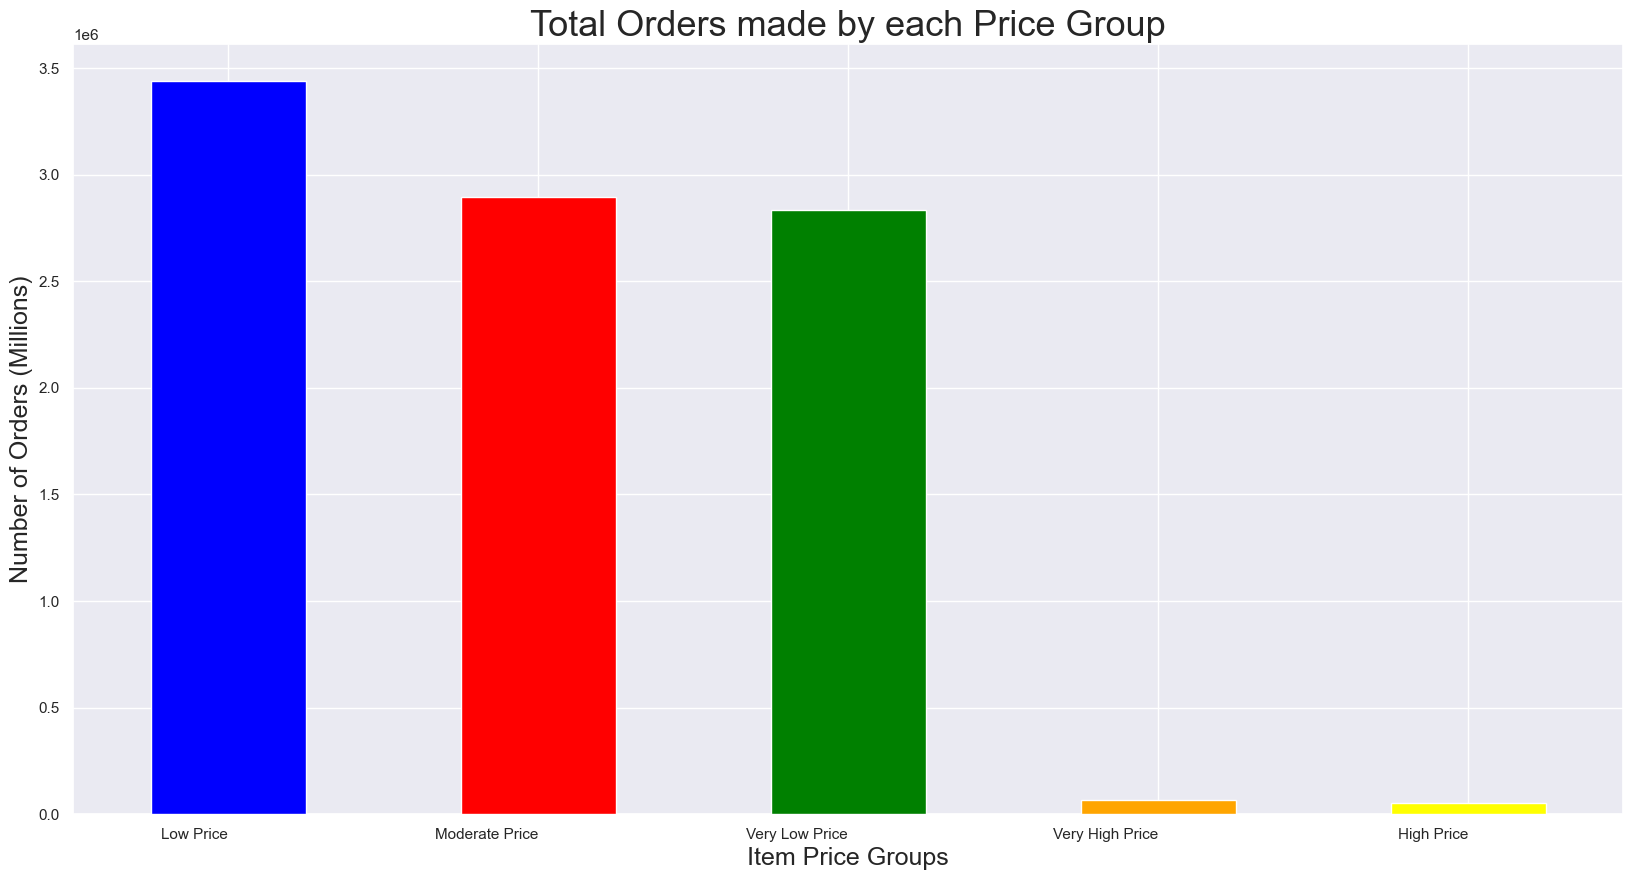

In [73]:
# This creates a bar chart showing the distribution of orders for each price_group
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Ordersby_Price_bar = small_ords_prods_cust['price_group'].value_counts().plot.bar(color = color, width=.5, figsize = (20,10), zorder=3)

plt.xlabel('Item Price Groups', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Total Orders made by each Price Group', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=0, ha='right')

plt.show()

#### Observation:
It seems that the majority of orders were made for items in the lower price groups. Items in the moderate price groups ($10-$15) and very low price groups ($1-$5) had equal share in number of orders. The lowest number of purchases were for items in the very high and high price range, items costing more than $15. 

In [74]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Price_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Price Group Line Chart.png'))

## 4. Most Popular Products

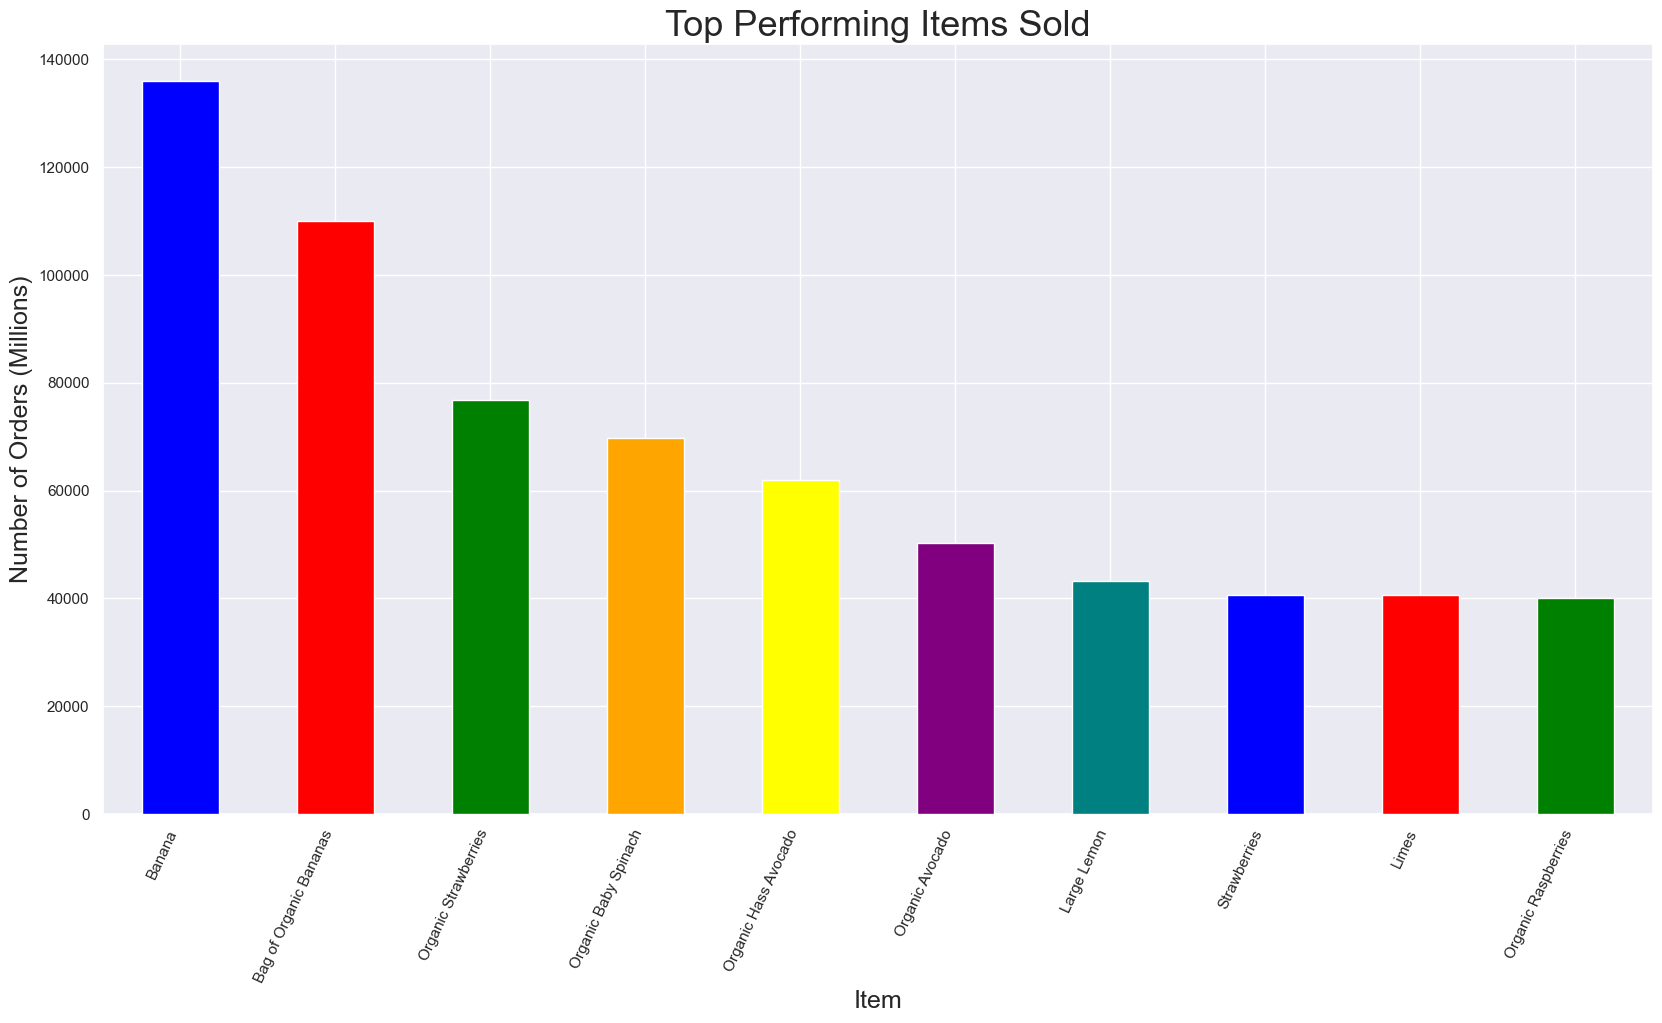

In [101]:
# This bar chart shows the top 10 most popular products purchased by customers
top_10 = (small_ords_prods_cust['product_name'].value_counts()).iloc[:10]
Top_Products_Bar = top_10.plot.bar(color = color, width=.5, figsize = (20,10), zorder=3)

plt.xlabel('Item', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Top Performing Items Sold', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=65, ha='right')

plt.show()

#### Observation:
It seems that the bananas are the most popular product sold, with organic bananas as the next most popular. Furthermore, all of the top 10 items are foods mainly fruits and vegetables. This follows the observations made with amount of orders for price range and for each department. Produce and low price range items were the most purchased. 

In [102]:
# This code exports the bar chart figure into the Jupyter folder
Top_Products_Bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Top 10 Products Bar Chart.png'))

## 5. Ordering Habits based on Customer Loyalty

In [139]:
small_ords_prods_cust2.head(1)

,product_name,prices,orders_day_of_week,order_time(hour),loyalty_flag,Average_Spent,Spending_Flag,order_frequency_flag,Region,Profile,Income_Group,dependants_group,WorkWeek,department,ordertime
0,Chocolate Sandwich Cookies,6,6,11,Regular customer,7,Low_spender,Frequent customer,Midwest,Old and Married,Low Income,Has dependants,Weekend,snacks,Morning


(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

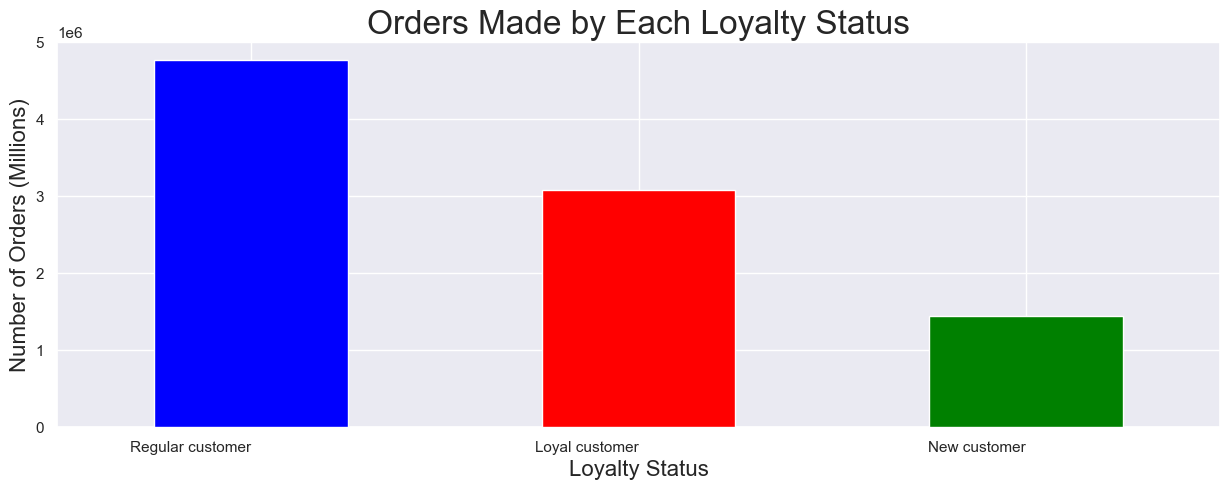

In [117]:
# This code creates a bar chart showing the total number of orders for each loyalty status 
Ordersby_Loyalty_bar = small_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = color, width=.5, figsize = (15,5), zorder=3)

plt.xlabel("Loyalty Status", fontdict={'fontsize' : 16})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 16})
plt.title('Orders Made by Each Loyalty Status', fontdict={'fontsize' : 24})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=0, ha='right')


#### Observation:
It seems that the Regular Customers are the ones making the most orders. This is expected because regular customers are the majority of customers in the dataset.

In [118]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Loyalty_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Orders by Loyalty Bar Chart.png'))

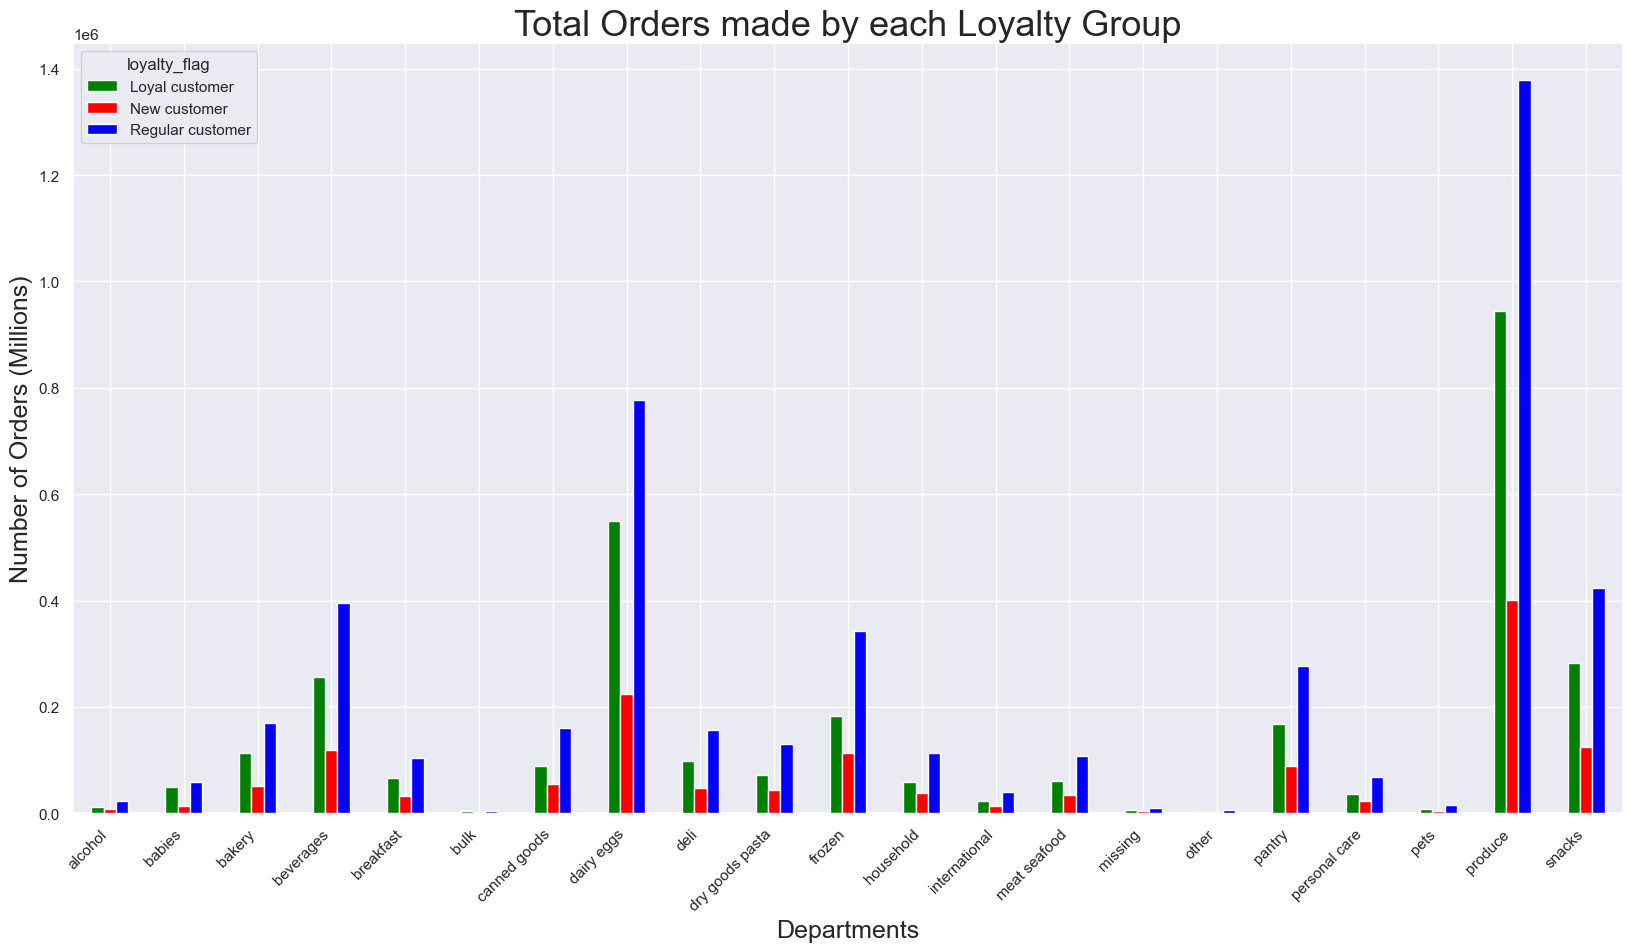

In [132]:
# This creates a bar chart showing the distribution of orders for each loyalty group among all department types
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Ordersper_DeptLoyalty_CT = pd.crosstab(small_ords_prods_cust2['department'], small_ords_prods_cust2['loyalty_flag'], dropna = False)
Ordersper_DeptLoyalty_bar = Ordersper_DeptLoyalty_CT.plot(kind='bar', stacked = False, width=.5, color = color3, figsize = (20,10), zorder=3)

plt.xlabel('Departments', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Total Orders made by each Loyalty Group', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=45, ha='right')

plt.show()

#### Observation:
It seems that the each loyalty group follows the general trend of orders. The most orders is with produce, dairy eggs, and beverages which follows the trend for overall orders by department. Furthermore, for each department, loyalty groups follow their general pattern with the regular customers making the majority of orders, followed by loyal customers, then new customers. 

In [133]:
# This code exports the bar chart figure into the Jupyter folder
Ordersper_DeptLoyalty_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Departmental Orders by Loyalty Bar Chart.png'))

## 6. Ordering Habits based on Customer Region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

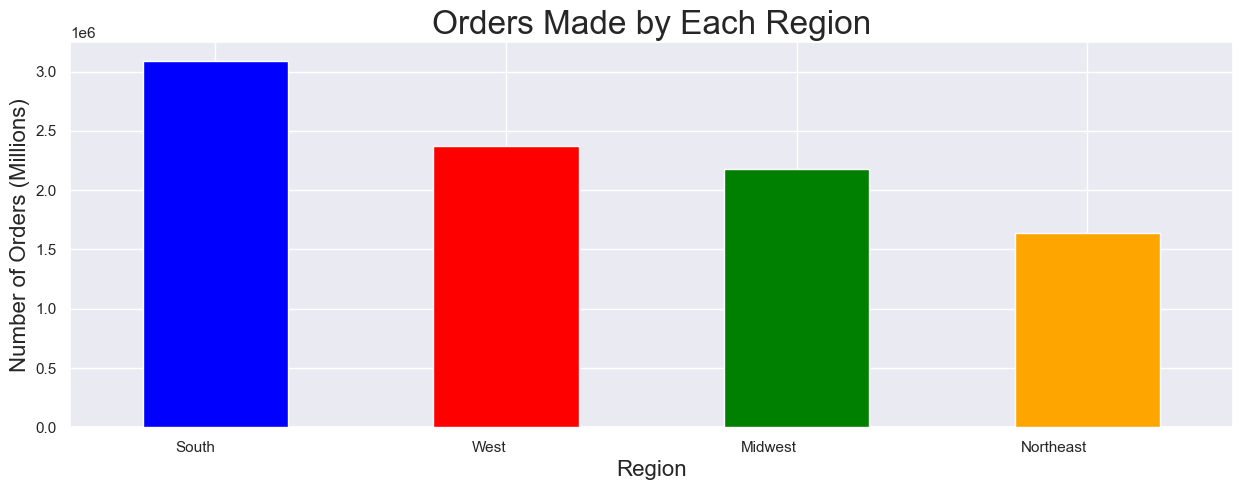

In [134]:
# This code creates a bar chart showing the total number of orders made within each region
Ordersby_Region_bar = small_ords_prods_cust2['Region'].value_counts().plot.bar(color = color, width=.5, figsize = (15,5), zorder=3)

plt.xlabel("Region", fontdict={'fontsize' : 16})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 16})
plt.title('Orders Made by Each Region', fontdict={'fontsize' : 24})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=0, ha='right')


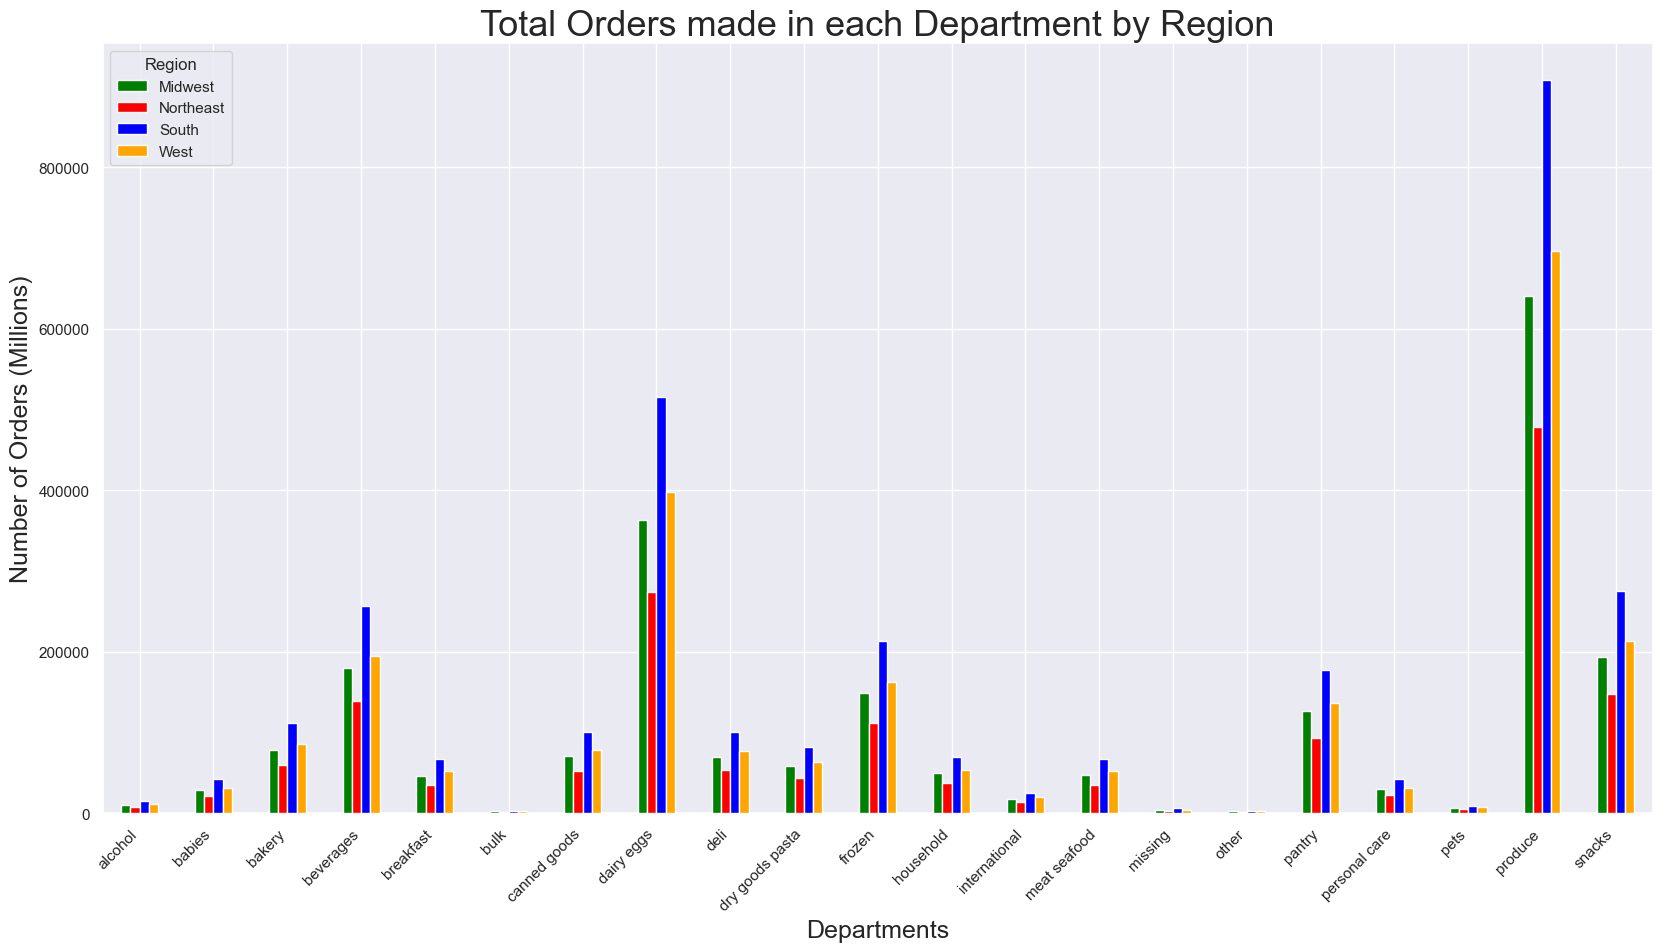

In [136]:
# This creates a bar chart showing the distribution of orders for each department, seperated by region
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Ordersper_DeptLoyalty_CT = pd.crosstab(small_ords_prods_cust2['department'], small_ords_prods_cust2['Region'], dropna = False)
DepOrdersby_Region_bar = Ordersper_DeptLoyalty_CT.plot(kind='bar', stacked = False, width=.5, color = color3, figsize = (20,10), zorder=3)

plt.xlabel('Departments', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Total Orders made in each Department by Region', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=45, ha='right')

plt.show()

## 7. Ordering Habits based on Customer Profiles

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Old and Married'),
  Text(1, 0, 'Young and Married'),
  Text(2, 0, 'Young and Single'),
  Text(3, 0, 'Old and Divorced'),
  Text(4, 0, 'Old and Single'),
  Text(5, 0, 'Young and Dependent')])

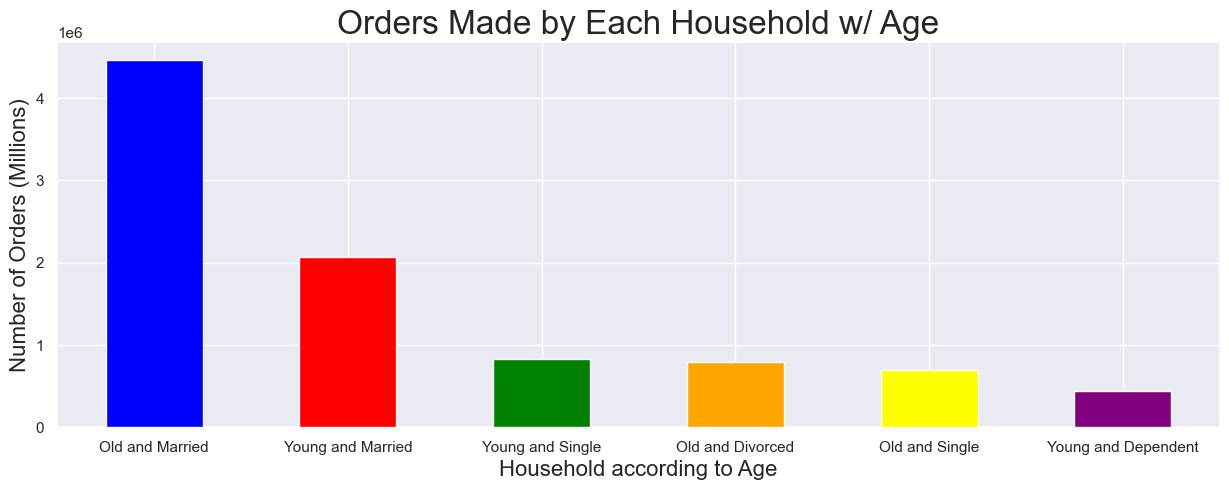

In [138]:
# This code creates a bar chart showing the total number of orders for each household customer profile
Ordersby_Region_bar = small_ords_prods_cust2['Profile'].value_counts().plot.bar(color = color, width=.5, figsize = (15,5), zorder=3)

plt.xlabel("Household according to Age", fontdict={'fontsize' : 16})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 16})
plt.title('Orders Made by Each Household w/ Age', fontdict={'fontsize' : 24})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=0, ha='center')


## Exporting Final Finished Dataset

In [10]:
# This code exports the final changed dataset into a new file in Data
ords_prods_cust2.to_pickle(os.path.join(path3,'Exercise 4.10','02 Data','Orders products all.pkl'))

In [11]:
ords_prods_cust2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   product_name          object 
 1   prices                float64
 2   orders_day_of_week    int64  
 3   order_time(hour)      int64  
 4   loyalty_flag          object 
 5   Average_Spent         float64
 6   Spending_Flag         object 
 7   order_frequency_flag  object 
 8   Region                object 
 9   Profile               object 
 10  Income_Group          object 
 11  dependants_group      object 
 12  WorkWeek              object 
 13  department            object 
 14  ordertime             object 
dtypes: float64(2), int64(2), object(11)
memory usage: 3.5+ GB
